In [1]:
import numpy as np
from pandas import *
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import dask.dataframe as ddf
import dask.multiprocessing

### 各情報の概要


In [2]:
sales = ddf.read_csv('home_data.csv')
sales = sales.compute(get=dask.multiprocessing.get)
print(sales.columns)
sales.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### テストデータと訓練データを分ける

In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sales, test_size=0.2)

In [4]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

### 敷地面積を元に予測してみる

In [20]:
x_train = DataFrame(train['sqft_living'])

In [21]:
y_train = DataFrame(train['price'])

In [22]:
reg = linear_model.LinearRegression()

In [23]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
reg.coef_

array([[ 283.99661018]])

### 予測したモデルをテストデータに適用する

In [25]:
x_test = DataFrame(test['sqft_living'])

In [26]:
y_test = DataFrame(test['price'])

In [27]:
a=reg.predict(x_test)

In [28]:
a

array([[ 1129013.22202397],
       [  384942.10334456],
       [  808097.0525172 ],
       ..., 
       [  487180.88301043],
       [  480648.96097622],
       [  399141.93385371]])

In [17]:
reg.intercept_

array([-49572.7102354])

### スコアを表示する

In [18]:
reg.score(x_train, y_train)

0.49248048130735483

#### 予測した直線を描画する

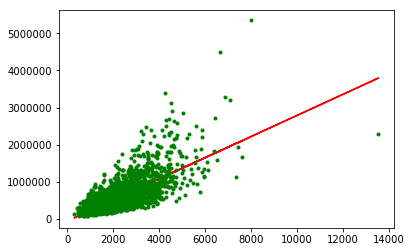

In [19]:
plt.plot(x_test, reg.predict(x_test), 'r-',x_test,y_test,'g.')
plt.show()